<a href="https://colab.research.google.com/github/Alino4kaAlino4ka/probability_theory_and_math_statistics/blob/main/probability_theory_dz_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Теория вероятностей и математическая статистика (семинары)

Урок 8. Корреляционный анализ

---
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [21]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

zp, ks

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

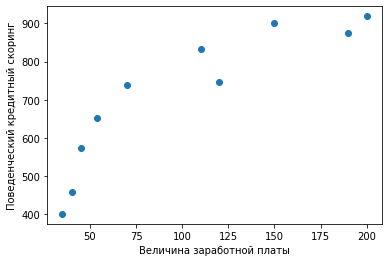

In [22]:
plt.scatter(zp, ks)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

In [23]:
def covar(arr1, arr2):
    MXY = sum(arr1 * arr2) / len(arr1)
    MX = sum(arr1) / len(arr1)
    MY = sum(arr2) / len(arr2)
    return MXY - MX * MY


covar(zp, ks)

9157.839999999997

In [39]:
np.cov(zp, ks, ddof=0)

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [41]:
def sigma(arr, offset=True):
    mean_arr = sum(arr) / len(arr)
    square_dev = (arr - mean_arr) ** 2
    variance = sum(square_dev) / len(arr) if offset \
    else sum(square_dev) / (len(arr) - 1)
    return variance ** 0.5  


r = covar(zp, ks) / (sigma(zp) * sigma(ks))
print(f'Коэффициент корреляции r = {r: .5f}')

Коэффициент корреляции r =  0.88749


In [42]:
r1 = np.cov(zp, ks, ddof=1) / (sigma(zp, offset=False) * sigma(ks, offset=False))
print(f'Коэффициент корреляции r = {r1}')

Коэффициент корреляции r = [[0.33866702 0.88749009]
 [0.88749009 2.95275283]]


In [43]:
np.corrcoef(zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [62]:
stats.spearmanr(zp, ks)

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [44]:
df = pd.DataFrame(data={'zp':zp, 'ks':ks})
df

,zp,ks
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


In [45]:
df.corr()

,zp,ks
zp,1.00000,0.88749
ks,0.88749,1.00000


---
---
 Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [52]:
arr = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'Среднее выборочное: {np.mean(arr):.3f},\n'
      f'Размер выборки n={len(arr)},\n'
      f'Среднее квадратическое отклонение по выборке(несмещенное): {np.std(arr, ddof=1):.3f}.')

Среднее выборочное: 118.100,
Размер выборки n=10,
Среднее квадратическое отклонение по выборке(несмещенное):       10.546.


In [49]:
def t_from_table(confidens, len_arr):
    alpha = (1 - confidens)
    return stats.t.ppf(1 - alpha / 2, len_arr - 1)

    
print(f'Табличное значение t-критерия для 95%-го доверительного интервала \
данной выборки: {t_from_table(0.95, len(arr)):.3f}')

Табличное значение t-критерия для 95%-го доверительного интервала данной выборки: 2.262


In [57]:
def confidens_int(arr, confidens):
    m = np.mean(arr)
    l = len(arr)
    return round(m - t_from_table(confidens, l) * np.std(arr, ddof=1) / l ** 0.5, 3), \
           round(m + t_from_table(confidens, l) * np.std(arr, ddof=1) / l ** 0.5, 3)


print(f'95%-й доверительный интервал для истинного значения IQ: {confidens_int(arr, 0.95)}.')

95%-й доверительный интервал для истинного значения IQ: (110.556, 125.644).


---
---
---
 Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95

In [61]:
start = 174.2 - (1.96 * 25 ** 0.5) / 27 ** 0.5
end = 174.2 + (1.96 * 25 ** 0.5) / 27 ** 0.5

print(f'95%-й доверительный интервал для оценки математического ожидания \
генеральной совокупности: [{start:.3f} ; {end:.3f}].')

95%-й доверительный интервал для оценки математического ожидания генеральной совокупности: [172.314 ; 176.086].
